# Artificial Intelligence 
### L.EIC – 3rd Year/2nd Semester
### Exercise Sheet 3
## Optimization/Meta-Heuristics

**3.1 Timetabling Problem Solving using Local Search/Simulated Annealing**  

Suppose that you have access to the information on students enrolled in various elective subjects of a master's/doctoral program. Each subject has only one weekly class. We want to build a schedule/timetable using only a specified number of slots (available hours) and minimizing the number of incompatibilities for students (i.e., subjects that enrolled students will not be able to attend because of temporal overlaps in the respective schedules). To do this, the class of each subject must be assigned to a slot (from the available ones). Consider the example problem represented below: 

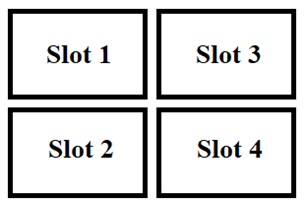

**Facts Representation**  

slots (4).  
disciplines (12).  
students (12).  
discipline (1, [1,2,3,4,5]).  # Students 1,2,3,4,5 enrolled in discipline 1  
discipline (2, [6,7,8,9]).  
discipline (3, [10,11,12]).  
discipline (4, [1,2,3,4]).  
discipline (5, [5,6,7,8]).  
discipline (6, [9,10,11,12]).  
discipline (7, [1,2,3,5]).  
discipline (8, [6,7,8]).  
discipline (9, [4,9,10,11,12]).  
discipline (10, [1,2,4,5]).  
discipline (11, [3,6,7,8]).  
discipline (12, [9,10,11,12]). # Students 9,10,11,12 enrolled in discipline 12  

**Text File Representation**  

4 12 12      # Problem with 4 Slots and 12 Disciplines and 12 students  
1 2 3 4 5    // Students 1,2,3,4,5 enrolled in discipline 1  
6 7 8 9  
10 11 12  
1 2 3 4  
5 6 7 8  
9 10 11 12  
1 2 3 5  
6 7 8  
4 9 10 11 12  
1 2 4 5  
3 6 7 8  
9 10 11 12    // Students 9,10,11,12 enrolled in discipline 12  

a)	Define a means of representation of a solution and create a method that allows you to randomly create a solution.  

b)	Build a function that allows you to calculate an incompatibilities table, that is, for each pair of subjects (discipline) calculates the number of students who are enrolled in both.  

c)	In this problem, the simplest representation for a solution (assignment of disciplines to slots) consists of associating, to each discipline 1..nd, a slot 1..ns, where nd is the number of disciplines and ns is the number of slots. For this purpose, we can use a list of integers nd, whose values are numbers from 1 to ns. The list index identifies the respective discipline, and the value inside the list represents the slot to which it has been assigned. For example, in list [4,1,2,3,2,4,1,1,2,2,2,3] discipline 1 has been assigned to slot 4, such as discipline 6. Implement a function that allows you to evaluate a particular solution, by calculating the total number of students enrolled in overlapping subjects.  

d)	Define one or more neighboring spaces and neighbor functions capable of calculating the neighbors of a solution.  

In [1]:
# Problem Definition

import numpy as np
import copy, random, math

enrollments = {
    1: [1,2,3,4,5],
    2: [6,7,8,9], 
    3: [10,11,12],
    4: [1,2,3,4],
    5: [5,6,7,8],
    6: [9,10,11,12],
    7: [1,2,3,5],
    8: [6,7,8],
    9: [4,9,10,11,12],
    10: [1,2,4,5],
    11: [3,6,7,8],
    12: [9,10,11,12]
}
slots = 4
num_students = 12
num_enrollments = len(enrollments)

# 4.1 a)
def generate_random_solution():
    return np.random.randint(1, slots + 1, num_enrollments)

# 4.1 b)
def get_num_incompatibilities(discipline_1, discipline_2):
    if (discipline_1 not in enrollments or discipline_2 not in enrollments):
        return 0
    incompatibilities = [student for student in enrollments[discipline_1] if student in enrollments[discipline_2]];
    return len(incompatibilities)
    
# 4.1 c)
def evaluate_solution(solution):
    num_incompatibilities = 0

    for i in range(0, num_enrollments-1):
        for j in range(i+1, len(solution)):
            if (solution[i] == solution[j]):
                num_incompatibilities += get_num_incompatibilities(i+1, j+1)
    
    return -num_incompatibilities

# 4.1 d)
# Change the slot of a discipline
def get_neighbor_solution1(solution):
    neighbor = copy.deepcopy(solution)
    
    index = np.random.randint(0, num_enrollments)
    neighbor[index] = (neighbor[index] + np.random.randint(1, slots)-1) % slots + 1
    
    return neighbor

# Exchange the slots of two disciplines
def get_neighbor_solution2(solution):
    neighbor_solution = copy.deepcopy(solution)
    
    index1 = np.random.randint(0, num_enrollments)
    index2 = (index1 + np.random.randint(1, num_enrollments)) % num_enrollments
    neighbor_solution[index1], neighbor_solution[index2] = \
    neighbor_solution[index2], neighbor_solution[index1]
    
    return neighbor_solution

# Neighbour 1 or 2 with 50% each
def get_neighbor_solution3(solution):
    if (np.random.randint(0,2)==0):
        return get_neighbor_solution1(solution)
    else:
        return get_neighbor_solution2(solution)

In [2]:
#Test Solution Generation
print("Test Solution Generation")
s = generate_random_solution()
print(s)

#Test Incompatibility Matrix
print("Test Incompatibility Matrix")
print('   1  2  3  4  5  6  7  8  9 10 11 12')
for d1 in range(0,num_enrollments):
        print(d1+1, end='  ')
        for d2 in range (0,num_enrollments):
            print(get_num_incompatibilities(d1,d2), end='  ')
        print()

#Test Evaluation
print("Test Evaluation")
print(evaluate_solution(s))
print(evaluate_solution([1,1,1,2,2,2,3,3,3,4,4,4]))

#Test Neighbours
print("Test Neighbours")
s = [1,1,1,2,2,2,3,3,3,4,4,4]
print(s)
for d1 in range(0,20):
    print(get_neighbor_solution1(s))

Test Solution Generation
[1 3 1 4 4 4 1 2 2 3 3 2]
Test Incompatibility Matrix
   1  2  3  4  5  6  7  8  9 10 11 12
1  0  0  0  0  0  0  0  0  0  0  0  0  
2  0  5  0  0  4  1  0  4  0  1  4  1  
3  0  0  4  0  0  3  1  0  3  1  0  3  
4  0  0  0  3  0  0  3  0  0  3  0  0  
5  0  4  0  0  4  0  0  3  0  1  3  1  
6  0  1  3  0  0  4  0  1  3  0  1  3  
7  0  0  1  3  0  0  4  0  0  4  0  0  
8  0  4  0  0  3  1  0  4  0  0  3  1  
9  0  0  3  0  0  3  0  0  3  0  0  3  
10  0  1  1  3  1  0  4  0  0  5  1  0  
11  0  4  0  0  3  1  0  3  0  1  4  0  
12  0  1  3  0  1  3  0  1  3  0  0  4  
Test Evaluation
-11
0
Test Neighbours
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]
[1, 1, 1, 2, 2, 2, 3, 2, 3, 4, 4, 4]
[1, 1, 1, 2, 2, 4, 3, 3, 3, 4, 4, 4]
[1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4]
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 1]
[1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 4, 4]
[1, 1, 1, 2, 2, 2, 1, 3, 3, 4, 4, 4]
[1, 1, 1, 4, 2, 2, 3, 3, 3, 4, 4, 4]
[1, 1, 1, 2, 2, 1, 3, 3, 3, 4, 4, 4]
[1, 1, 1, 2, 1, 2, 3, 3, 3, 4

In [3]:
# 4.1 e) Hill Climbing
def get_hc_solution(num_iterations, log=False):
    iteration = 0;
    best_solution = generate_random_solution() # Best solution after 'num_iterations' iterations without improvement
    best_score = evaluate_solution(best_solution)
    
    print(f"Init Solution:  {best_solution}, score: {best_score}")
    
    while iteration < num_iterations:
        iteration += 1
    
        neighbor_solution = get_neighbor_solution3(best_solution)
        neighbor_score = evaluate_solution(neighbor_solution)
        if (neighbor_score > best_score):
            best_solution = neighbor_solution
            best_score = neighbor_score
            iteration = 0
    
            if log:
                (print(f"Solution:       {best_solution}, score: {best_score}"))
            
    print(f"Final Solution: {best_solution}, score: {best_score}")
    return best_solution

In [4]:
print("Hill climbing:\n")
get_hc_solution(10000, True)

Hill climbing:

Init Solution:  [2 1 2 3 3 2 4 4 2 2 3 1], score: -21
Solution:       [2 1 4 3 3 2 4 4 2 2 3 1], score: -15
Solution:       [2 1 4 3 3 2 4 4 2 3 2 1], score: -11
Solution:       [2 1 4 1 3 2 4 4 2 3 2 3], score: -7
Solution:       [2 1 4 1 3 4 4 4 2 3 2 3], score: -6
Solution:       [2 1 4 1 3 1 4 4 2 3 2 3], score: -4
Solution:       [2 4 4 1 3 1 4 1 2 3 2 3], score: -3
Solution:       [3 4 4 1 3 1 4 1 2 2 2 3], score: -2
Solution:       [1 4 4 3 3 1 4 1 2 2 2 3], score: -1
Final Solution: [1 4 4 3 3 1 4 1 2 2 2 3], score: -1


array([1, 4, 4, 3, 3, 1, 4, 1, 2, 2, 2, 3])

In [5]:
# 4.1 e) Simulated Annealing
def get_sa_solution(num_iterations, log=False):
    iteration = 0;
    temperature = 1000;
    solution = generate_random_solution() # Best solution after 'num_iterations' iterations without improvement
    score = evaluate_solution(solution)
    
    best_solution = copy.deepcopy(solution)
    best_score = score
    
    print(f"Init Solution:  {best_solution}, score: {best_score}")
    
    while iteration < num_iterations:
        temperature = temperature * 0.999  # Test with different cooling schedules
        iteration += 1
        
        neighbor_solution = get_neighbor_solution3(best_solution)
        neighbor_score = evaluate_solution(neighbor_solution)
        delta = neighbor_score - score
        if (delta > 0 or random.random() < np.exp(delta/temperature)):
            solution = neighbor_solution
            score = neighbor_score
        
            if log:
                print(f"Solution:       {best_solution}, score: {best_score},  Temp: {temperature}, Prob: {np.exp(delta/temperature)}")

            if (score > best_score):
                best_solution = copy.deepcopy(solution)
                best_score = score
                iteration = 0
                if log:
                    print(f"Best Solution:  {best_solution}, score: {best_score},  Temp: {temperature}, Prob: {np.exp(delta/temperature)}")
                
    print(f"Final Solution: {best_solution}, score: {best_score}")
    return best_solution 

In [6]:
print("\nSimulated Annealing:\n")
get_sa_solution(10000, True)


Simulated Annealing:

Init Solution:  [2 2 4 2 2 1 1 1 4 1 4 1], score: -18
Solution:       [2 2 4 2 2 1 1 1 4 1 4 1], score: -18,  Temp: 999.0, Prob: 1.0
Solution:       [2 2 4 2 2 1 1 1 4 1 4 1], score: -18,  Temp: 998.001, Prob: 0.9979980006713404
Solution:       [2 2 4 2 2 1 1 1 4 1 4 1], score: -18,  Temp: 997.0029989999999, Prob: 1.0030135496689188
Best Solution:  [2 4 4 2 2 1 1 1 2 1 4 1], score: -17,  Temp: 997.0029989999999, Prob: 1.0030135496689188
Solution:       [2 4 4 2 2 1 1 1 2 1 4 1], score: -17,  Temp: 996.005996001, Prob: 1.0
Solution:       [2 4 4 2 2 1 1 1 2 1 4 1], score: -17,  Temp: 995.0099900049989, Prob: 0.9929895831782712
Solution:       [2 4 4 2 2 1 1 1 2 1 4 1], score: -17,  Temp: 994.014980014994, Prob: 1.0030226221062566
Solution:       [2 4 4 2 2 1 1 1 2 1 4 1], score: -17,  Temp: 993.020965034979, Prob: 0.9979879706817455
Solution:       [2 4 4 2 2 1 1 1 2 1 4 1], score: -17,  Temp: 992.027944069944, Prob: 1.0060665441154615
Solution:       [2 4 4 2 2 1

array([4, 4, 4, 2, 2, 2, 1, 1, 1, 3, 3, 3])

In [7]:
# Genetic Algorithms 

# 4.2 c)
def midpoint_crossover(solution_1, solution_2):

    mid_index = math.trunc(len(solution_1)/2)
    child_1 = np.concatenate((solution_1[0:mid_index], solution_2[mid_index:]))
    child_2 = np.concatenate((solution_2[0:mid_index], solution_1[mid_index:]))
    
    return child_1, child_2

def randompoint_crossover(solution_1, solution_2):
    
    length = len(solution_1)
    index = np.random.randint(1, length-1)
    child_1 = np.concatenate((solution_1[0:index], solution_2[index:]))
    child_2 = np.concatenate((solution_2[0:index], solution_1[index:]))
    
    return child_1, child_2
    
#4.2 d)
def generate_population(population_size):
    solutions = []
    for i in range(population_size):
        solutions.append(generate_random_solution())
    return solutions

def print_population(population):
    solutions = []
    for i in range(len(population)):
        print(f"Solution {i}: {population[i]}, {evaluate_solution(population[i])}")
    
def tournament_select(population, tournament_size):
        
    #Your Code Here
    
    return best_solution

def get_greatest_fit(population):
    best_solution = population[0]
    best_score = evaluate_solution(population[0])
    for i in range(1, len(population)):
        score = evaluate_solution(population[i])
        if score > best_score:
            best_score = score
            best_solution = population[i]
    return best_solution, best_score

def replace_least_fittest(population, offspring):
    least_fittest_index = 0
    least_fittest_value = evaluate_solution(population[0])
    for i in range(1, len(population)):
        score = evaluate_solution(population[i])
        if score < least_fittest_value:
            least_fittest_value = score
            least_fittest_index = i
    population[least_fittest_index] = offspring

def roulette_select(population):
    
    #Your Code Here
        
#4.2 e)
def mutate_solution_1(solution):
    index_1 = np.random.randint(0, len(solution))
    index_2 = (index_1 + np.random.randint(0, len(solution))) % (len(solution) - 1) # Efficient way to generate a non-repeated index
    solution[index_1], solution[index_2] = solution[index_2], solution[index_1]
    return solution

def mutate_solution_2(solution):
    index = np.random.randint(0, len(solution))
    solution[index] = np.random.randint(1, slots + 1)
    return solution

def mutate_solution_3(solution):
    return (get_neighbor_solution3(solution))

#4.3 f)       

def genetic_algorithm(num_iterations, population_size, crossover_func, mutation_func, log=False):
    population = generate_population(population_size)
    
    best_solution = population[0] # Initial solution
    best_score = evaluate_solution(population[0])
    best_solution_generation = 0 # Generation on which the best solution was found
    
    generation_no = 0
    
    print(f"Initial solution: {best_solution}, score: {best_score}")
    
    while(num_iterations > 0):
        
        generation_no += 1
        
        tournment_winner_sol = tournament_select(population, 4)
        roulette_winner_sol = roulette_select(population)
        
        # Next generation Crossover and Mutation
        
        #Your Code Here
        
        # Checking the greatest fit among the current population
        greatest_fit, greatest_fit_score = get_greatest_fit(population)
        if greatest_fit_score > best_score:
            best_solution = greatest_fit
            best_score = greatest_fit_score
            best_solution_generation = generation_no
            if log:
                print(f"\nGeneration: {generation_no }")
                print(f"Solution: {best_solution}, score: {best_score}")
                print_population(population)
        else:
            num_iterations -= 1
        
    print(f"  Final solution: {best_solution}, score: {best_score}")
    print(f"  Found on generation {best_solution_generation}")
    
    return best_solution

IndentationError: expected an indented block (<ipython-input-7-bc9034fb2544>, line 64)

In [ ]:
#Test Crossover
s1 = generate_random_solution()
s2 = generate_random_solution()
print(s1)
print(s2)
c1, c2 = midpoint_crossover(s1, s2)
print(c1)
print(c2)
c1, c2 = randompoint_crossover(s1, s2)
print(c1)
print(c2)
#Test Mutation
c3 = mutate_solution_3(c1)
c4 = mutate_solution_3(c2)
print(c3)
print(c4)

In [ ]:
pop = generate_population(10)
print_population(pop)

In [ ]:
print("Hill climbing:\n")
get_hc_solution(10000, True)

In [ ]:
print("\nSimulated Annealing:\n")
get_sa_solution(10000, True)

In [ ]:
print("\nGeneric Algorithm:\n")
genetic_algorithm(1000, 50, midpoint_crossover, mutate_solution_3, True)